## Парсинг данных

In [1]:
import requests
from multiprocessing.dummy import Pool as ThreadPool
from lxml import etree
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np

In [16]:
def moneyfrom(in_str):
    get_data = [int(s) for s in 
                in_str.replace("-", " ").replace("–", " ").split(" ") if s.isdigit()]
    if len(get_data) == 2:
        if get_data[0] == 700:
            return 2
        if get_data[0] == 1500:
            return 3
    else:
        if get_data[0] == 700:
            return 1
        if get_data[0] == 2500:
            return 4

def getInfoFromResponse(data, resp, num_resp):
    if resp.status_code != 200:
        print("Error", num_resp)
        return
    if num_resp % 20 == 0:   
        print(resp, num_resp)
    bs = BeautifulSoup(resp.text, 'lxml')
    for item in bs.find_all('div', 'places_info'): 
        find_name = item.find('span', 'places_name')
        if find_name is not None: 
            name = find_name.text.strip()
        else: 
            name = None

        find_address = item.find('span', 'places_address')
        if find_address is not None:     
            address = find_address.text.strip()
        else: 
            address = None

        find_metro = item.find('span', 'places_metro')
        if find_metro is not None:     
            metro = find_metro.text.strip()[3:]
        else: 
            metro = None

        find_rating = item.find('div', 'rating_number')
        if find_rating is not None: 
            rating = item.find('div', 'rating_number').text.strip()
        else:
            rating = None
        
        find_money = item.find('span', "range s-tooltip")
        if find_money is not None:
            money = moneyfrom(find_money.get("data-title"))
        else:
            money = None

        data.append((name, address, metro, rating, money))

In [ ]:
data = list()
FIRST_URL = "https://www.afisha.ru/msk/restaurants/restaurant_list/"
first_resp = requests.get(FIRST_URL)
getInfoFromResponse(data, first_resp, 1)

t = ThreadPool(2)
start_page = 2
end_page = 453
r = t.map(lambda x: getInfoFromResponse(data, 
                    requests.get("https://www.afisha.ru/msk/restaurants/restaurant_list/page%d/?view=list" % x), x), 
          range(start_page, end_page))
t.close()
t.join()

<Response [200]> 60
<Response [200]> 20
<Response [200]> 80
<Response [200]> 40
<Response [200]> 100
<Response [200]> 120
<Response [200]> 180
<Response [200]> 140
<Response [200]> 200
<Response [200]> 160
<Response [200]> 220
<Response [200]> 240
<Response [200]> 300
<Response [200]> 260
<Response [200]> 320
<Response [200]> 280
<Response [200]> 340
<Response [200]> 360
<Response [200]> 420
Error 430
Error 431
Error 432
Error 433
Error 434
Error 435
Error 436


In [ ]:
import pandas as pd

In [ ]:
df = pd.DataFrame(np.array(data, dtype = object), columns=["Name", "Address", "Metro", "Rating", "Money"])

In [ ]:
df.to_csv("parsed_afisha.csv", sep=',', encoding='utf-8')

In [2]:
df = pd.DataFrame.from_csv("parsed_afisha.csv", sep=',', encoding='utf-8')

/Users/meudon/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls
  """Entry point for launching an IPython kernel.


In [3]:
df.head()

,Name,Address,Metro,Rating,Money
0,Хлеб и вино,"просп. Вернадского, 94, корп. 8, ЖК «Миракс-парк»","Юго-Западная, Тропарево",NaN,2.0
1,Beer Happens,"Сретенка, 24/2, стр. 1",Сухаревская,9.1,2.0
2,Винный базар на Комсомольском,"Комсомольский просп., 14/1, корп. 2",Парк культуры,9.1,2.0
3,Grammy's,"Кутузовский просп., 2/1, стр. 6, в Конгресс-па...",Киевская,9.0,3.0
4,Mitzva Bar,"Пятницкая, 3/4, стр. 1","Новокузнецкая, Третьяковская",9.0,2.0


In [85]:
import geopandas as gpd
import matplotlib.pyplot as plt
%matplotlib inline

mo_gdf = gpd.read_file('./atd/mo.shp')
mo_gdf.head()

,NAME,OKATO,OKTMO,NAME_AO,OKATO_AO,ABBREV_AO,TYPE_MO,geometry
0,Киевский,45298555,45945000,Троицкий,45298000,Троицкий,Поселение,"(POLYGON ((36.8031012 55.4408329, 36.8031903 5..."
1,Филёвский Парк,45268595,45328000,Западный,45268000,ЗАО,Муниципальный округ,"POLYGON ((37.4276499 55.7482092, 37.4284863 55..."
2,Новофёдоровское,45298567,45954000,Троицкий,45298000,Троицкий,Поселение,"POLYGON ((36.8035692 55.4516224, 36.8045117 55..."
3,Роговское,45298575,45956000,Троицкий,45298000,Троицкий,Поселение,"POLYGON ((36.9372397 55.2413907, 36.9372604 55..."
4,"""Мосрентген""",45297568,45953000,Новомосковский,45297000,Новомосковский,Поселение,"POLYGON ((37.4395575 55.6273129, 37.4401803 55..."


In [4]:
import geopandas as gpd
import matplotlib.pyplot as plt
%matplotlib inline

mo_gdf = gpd.read_file('./atd/mo.shp')
mo_gdf.head()

,NAME,OKATO,OKTMO,NAME_AO,OKATO_AO,ABBREV_AO,TYPE_MO,geometry
0,Киевский,45298555,45945000,Троицкий,45298000,Троицкий,Поселение,"(POLYGON ((36.8031012 55.4408329, 36.8031903 5..."
1,Филёвский Парк,45268595,45328000,Западный,45268000,ЗАО,Муниципальный округ,"POLYGON ((37.4276499 55.7482092, 37.4284863 55..."
2,Новофёдоровское,45298567,45954000,Троицкий,45298000,Троицкий,Поселение,"POLYGON ((36.8035692 55.4516224, 36.8045117 55..."
3,Роговское,45298575,45956000,Троицкий,45298000,Троицкий,Поселение,"POLYGON ((36.9372397 55.2413907, 36.9372604 55..."
4,"""Мосрентген""",45297568,45953000,Новомосковский,45297000,Новомосковский,Поселение,"POLYGON ((37.4395575 55.6273129, 37.4401803 55..."


In [65]:
import geocoder

g = geocoder.yandex('Комсомольский просп., 14/1, корп. 2')
g.json

{'accuracy': 'exact',
 'address': 'Russian Federation, Moscow, Komsomolsky Avenue, 14/1к2',
 'country': 'Russian Federation',
 'country_code': 'RU',
 'description': 'Moscow, Russian Federation',
 'lat': '55.731374',
 'lng': '37.589985',
 'ok': True,
 'quality': 'house',
 'raw': {'Point': {'pos': '37.589985 55.731374'},
  'boundedBy': {'Envelope': {'lowerCorner': '37.58588 55.729057',
    'upperCorner': '37.59409 55.73369'}},
  'description': 'Moscow, Russian Federation',
  'metaDataProperty': {'GeocoderMetaData': {'Address': {'Components': [{'kind': 'country',
       'name': 'Russian Federation'},
      {'kind': 'province', 'name': 'Tsentralny federalny okrug'},
      {'kind': 'province', 'name': 'Moscow'},
      {'kind': 'locality', 'name': 'Moscow'},
      {'kind': 'street', 'name': 'Komsomolsky Avenue'},
      {'kind': 'house', 'name': '14/1к2'}],
     'country_code': 'RU',
     'formatted': 'Moscow, Komsomolsky Avenue, 14/1к2',
     'postal_code': '119034'},
    'AddressDetails': {

In [67]:
g.json['lat'], g.json['lng']

('55.731374', '37.589985')

In [ ]:
lat = list()
lng = list()

for address in df.Address:
    if type(address) == str:
        g = geocoder.yandex(address)
        if g.json is not None:
            lat.append(g.json['lat'])
            lng.append(g.json['lng'])
        else:
            lat.append(None)
            lng.append(None)
    else:
        lat.append(None)
        lng.append(None)

In [ ]:
df['lng'] = lng
df['lat'] = lat
df['District'] = None

In [ ]:
from shapely.geometry import *

gSerDistricts = GeoSeries(mo_gdf.geometry)

for i in range(df.shape[0]):
    if df.iloc[i].lng is not None and df.iloc[i].lat is not None:
        p = Point(float(df.iloc[i].lng), float(df.iloc[i].lat))
        intercept_list = list(gSerDistricts.intersects(p))
        if np.sum(intercept_list) > 0:
            ndf.iloc[i, 7] = mo_gdf[intercept_list].iloc[0].NAME

In [ ]:
df.to_csv("parsed_afisha_districts.csv", sep=',', encoding='utf-8')

In [4]:
df = pd.DataFrame.from_csv("./parsed_afisha_districts.csv", sep=',', encoding='utf-8')

/Users/meudon/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls
  """Entry point for launching an IPython kernel.


In [5]:
df.head(10)

,Name,Address,Metro,Rating,Money,lat,lng,District
0,Хлеб и вино,"просп. Вернадского, 94, корп. 8, ЖК «Миракс-парк»","Юго-Западная, Тропарево",NaN,2.0,55.652674,37.476402,Тропарёво-Никулино
1,Beer Happens,"Сретенка, 24/2, стр. 1",Сухаревская,9.1,2.0,55.769838,37.632889,Красносельский
2,Винный базар на Комсомольском,"Комсомольский просп., 14/1, корп. 2",Парк культуры,9.1,2.0,55.731374,37.589985,Хамовники
3,Grammy's,"Кутузовский просп., 2/1, стр. 6, в Конгресс-па...",Киевская,9.0,3.0,NaN,NaN,NaN
4,Mitzva Bar,"Пятницкая, 3/4, стр. 1","Новокузнецкая, Третьяковская",9.0,2.0,55.745427,37.627166,Замоскворечье
5,Боэми,"Рочдельская, 11/5","Краснопресненская, Баррикадная",9.0,3.0,55.756462,37.569953,Пресненский
6,Lumberjack Bar,"Б.Спасоглинищевский пер., 3, стр. 5",Китай-город,9.0,3.0,55.756437,37.635188,Басманный
7,Бутчер,"Лубянский пр., 15/2",Китай-город,9.0,4.0,55.756817,37.632305,Басманный
8,Лейка,"Головинское ш., 5, ТЦ «Водный», 3 этаж",Водный стадион,9.0,2.0,55.840240,37.492024,Головинский
9,Pinzeria by Bontempi,"Б.Знаменский пер., 2, стр. 3",Кропоткинская,8.9,2.0,55.745934,37.602517,Хамовники


## Отрисовка 

Загрузим в df данные баров. В mo_gdf -- администранивное деление Москвы

In [139]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.DataFrame.from_csv("./parsed_afisha_districts.csv", sep=',', encoding='utf-8')
mo_gdf = gpd.read_file('./atd/mo.shp')
df.head()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls
  


,Name,Address,Metro,Rating,Money,lat,lng,District
0,Хлеб и вино,"просп. Вернадского, 94, корп. 8, ЖК «Миракс-парк»","Юго-Западная, Тропарево",NaN,2.0,55.652674,37.476402,Тропарёво-Никулино
1,Beer Happens,"Сретенка, 24/2, стр. 1",Сухаревская,9.1,2.0,55.769838,37.632889,Красносельский
2,Винный базар на Комсомольском,"Комсомольский просп., 14/1, корп. 2",Парк культуры,9.1,2.0,55.731374,37.589985,Хамовники
3,Grammy's,"Кутузовский просп., 2/1, стр. 6, в Конгресс-па...",Киевская,9.0,3.0,NaN,NaN,NaN
4,Mitzva Bar,"Пятницкая, 3/4, стр. 1","Новокузнецкая, Третьяковская",9.0,2.0,55.745427,37.627166,Замоскворечье


In [161]:
import numpy as np
df = df[df.District == df.District]
df.count()

Name        8100
Address     8100
Metro       7917
Rating      1109
Money       7733
lat         8100
lng         8100
District    8100
dtype: int64

Сгруппируем df по районам

In [162]:
df_grouped = df.groupby("District").mean()
df_grouped["Count"] = df.groupby("District").count()["lat"]
df_grouped.head()

,Rating,Money,lat,lng,Count
District,,,,,
Академический,6.146154,1.784615,55.684704,37.571702,68
Алексеевский,7.450000,1.536585,55.812199,37.643791,44
Алтуфьевский,NaN,1.428571,55.881580,37.592680,7
Арбат,6.538095,1.820961,55.751418,37.592596,244
Аэропорт,5.100000,1.557377,55.802947,37.530747,62


Соединим полученные датасеты

In [274]:
mo_gdf_joined = mo_gdf.set_index('NAME').join(df_grouped)
mo_gdf_joined.head(4)

,OKATO,OKTMO,NAME_AO,OKATO_AO,ABBREV_AO,TYPE_MO,geometry,Rating,Money,lat,lng,Count
NAME,,,,,,,,,,,,
Киевский,45298555,45945000,Троицкий,45298000,Троицкий,Поселение,"(POLYGON ((36.8031012 55.4408329, 36.8031903 5...",NaN,NaN,NaN,NaN,NaN
Филёвский Парк,45268595,45328000,Западный,45268000,ЗАО,Муниципальный округ,"POLYGON ((37.4276499 55.7482092, 37.4284863 55...",5.5,1.510204,55.744668,37.50203,50.0
Новофёдоровское,45298567,45954000,Троицкий,45298000,Троицкий,Поселение,"POLYGON ((36.8035692 55.4516224, 36.8045117 55...",NaN,NaN,NaN,NaN,NaN
Роговское,45298575,45956000,Троицкий,45298000,Троицкий,Поселение,"POLYGON ((36.9372397 55.2413907, 36.9372604 55...",NaN,NaN,NaN,NaN,NaN


In [329]:
mo_gdf_joined = mo_gdf_joined[(mo_gdf_joined.NAME_AO != "Троицкий") & (mo_gdf_joined.NAME_AO != "Новомосковский")]
mo_gdf_joined = mo_gdf_joined[(mo_gdf_joined.NAME_AO != "Зеленоградский") & (mo_gdf_joined.index != "Внуково")]
mo_gdf_joined = mo_gdf_joined[(mo_gdf_joined.index != "Кунцево")]
gpd.GeoDataFrame( pd.concat( [mo_gdf_joined,line], ignore_index=True) )

TypeError: cannot concatenate object of type "<class 'list'>"; only pd.Series, pd.DataFrame, and pd.Panel (deprecated) objs are valid

In [340]:
pd.concat([mo_gdf_joined,pd.DataFrame(line, mo_gdf_joined.columns)])

ValueError: Shape of passed values is (1, 13), indices imply (1, 12)

In [341]:
pd.DataFrame(line, mo_gdf_joined.columns)

ValueError: Shape of passed values is (1, 13), indices imply (1, 12)

In [337]:
line.remove("Кунцево")

In [288]:
a = list(mo_gdf_joined[(mo_gdf_joined.index == "Кунцево")].geometry[0])
a.remove(mo_gdf_joined[(mo_gdf_joined.index == "Кунцево")].geometry[0][1])

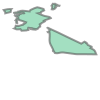

In [304]:
from shapely.ops import cascaded_union
aa = cascaded_union(a)
aa

In [319]:
line = list(mo_gdf_joined[(mo_gdf_joined.index == "Кунцево")].values[0])
line

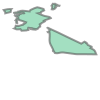

In [321]:
line[6]

In [269]:
min(mo_gdf_joined[mo_gdf_joined.ABBREV_AO == "ЗАО"].lng)

37.35085395454546

In [270]:
mo_gdf_joined[mo_gdf_joined.ABBREV_AO == "ЗАО"]

,OKATO,OKTMO,NAME_AO,OKATO_AO,ABBREV_AO,TYPE_MO,geometry,Rating,Money,lat,lng,Count
NAME,,,,,,,,,,,,
Филёвский Парк,45268595,45328000,Западный,45268000,ЗАО,Муниципальный округ,"POLYGON ((37.4276499 55.7482092, 37.4284863 55...",5.500000,1.510204,55.744668,37.502030,50.0
Можайский,45268569,45321000,Западный,45268000,ЗАО,Муниципальный округ,"POLYGON ((37.3260965 55.6828568, 37.3290907 55...",6.000000,1.437500,55.712238,37.401897,17.0
Ново-Переделкино,45268577,45322000,Западный,45268000,ЗАО,Муниципальный округ,"POLYGON ((37.3297949 55.6398421, 37.3304072 55...",6.900000,1.666667,55.639466,37.350854,22.0
Крылатское,45268560,45319000,Западный,45268000,ЗАО,Муниципальный округ,"POLYGON ((37.3653882 55.7718121, 37.3655168 55...",6.671429,1.607143,55.760824,37.405738,59.0
Солнцево,45268588,45326000,Западный,45268000,ЗАО,Муниципальный округ,"POLYGON ((37.3678536 55.6532045, 37.3697653 55...",NaN,1.538462,55.652353,37.402235,26.0
Очаково-Матвеевское,45268579,45323000,Западный,45268000,ЗАО,Муниципальный округ,"POLYGON ((37.4021617 55.6988389, 37.4022826 55...",NaN,1.352941,55.697181,37.457834,17.0
Тропарёво-Никулино,45268592,45327000,Западный,45268000,ЗАО,Муниципальный округ,"POLYGON ((37.4322665 55.662011, 37.4345467 55....",7.133333,1.670588,55.666583,37.476201,87.0
Фили-Давыдково,45268597,45329000,Западный,45268000,ЗАО,Муниципальный округ,"POLYGON ((37.4379707 55.737174, 37.4389451 55....",6.850000,1.777778,55.728551,37.469975,36.0
Раменки,45268584,45325000,Западный,45268000,ЗАО,Муниципальный округ,"POLYGON ((37.4663185 55.6945259, 37.4679853 55...",6.358333,1.773438,55.701627,37.514992,135.0


Тепловая карта по средней дороговизне

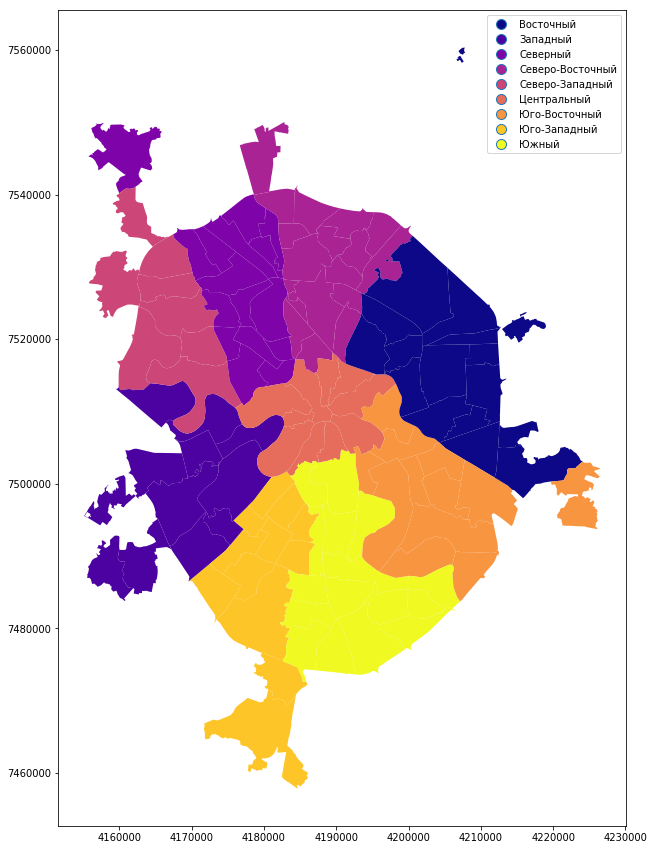

In [272]:
mo_gdf_wm = mo_gdf_joined.to_crs({'init' :'epsg:3857'}) #непосредственно преобразование проекции
mo_gdf_wm.plot(column = "NAME_AO", linewidth=0.5, cmap='plasma', legend = True, figsize=[15,15])

Тепловая карта по среднему рейтингу

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\colors.py:489: RuntimeWarning: invalid value encountered in less
  np.copyto(xa, -1, where=xa < 0.0)


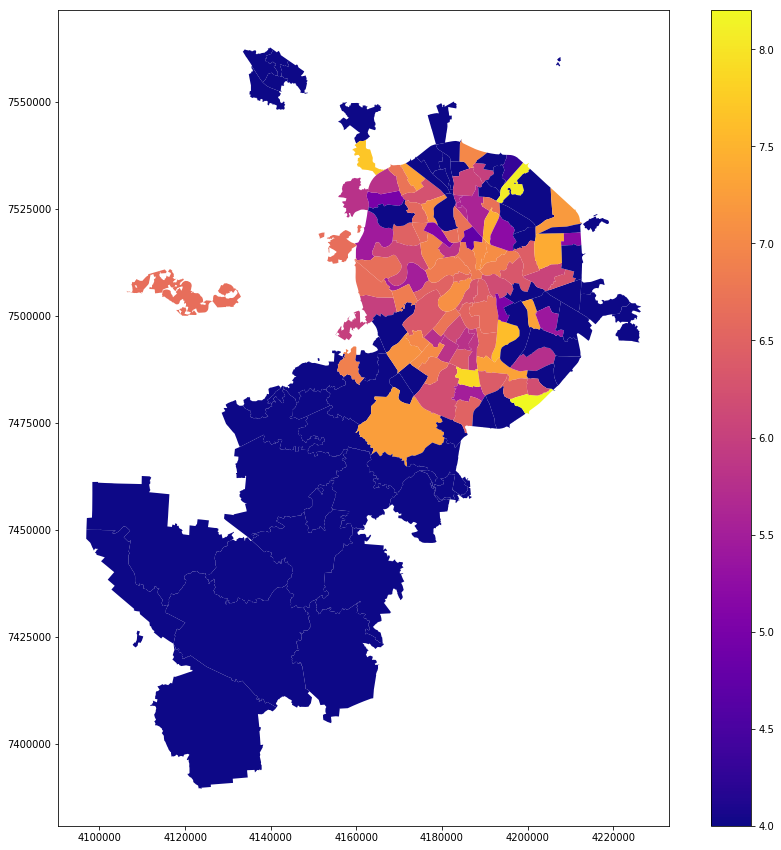

In [165]:
mo_gdf_wm = mo_gdf_joined.to_crs({'init' :'epsg:3857'}) #непосредственно преобразование проекции
mo_gdf_wm.plot(column = "Rating", linewidth=0.5, cmap='plasma', legend = True, figsize=[15,15])

Тепловая карта количества баров

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\colors.py:489: RuntimeWarning: invalid value encountered in less
  np.copyto(xa, -1, where=xa < 0.0)


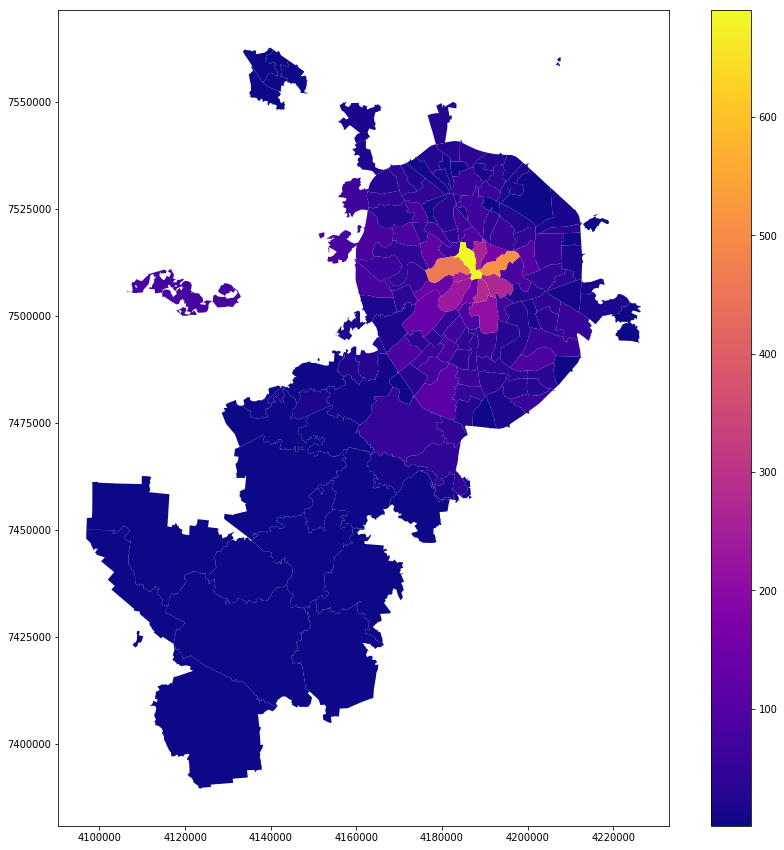

In [166]:
mo_gdf_wm = mo_gdf_joined.to_crs({'init' :'epsg:3857'}) #непосредственно преобразование проекции
mo_gdf_wm.plot(column = "Count", linewidth=0.5, cmap='plasma', legend = True, figsize=[15,15])

In [211]:
from geopandas import GeoDataFrame
from shapely.geometry import Point

bars = df[['Name', 'lat', 'lng']].copy()


geometry = [Point(xy) for xy in zip(bars.lng, bars.lat)]
s = geopandas.GeoSeries(geometry)
s.crs = {'init': 'epsg:4326', 'no_defs': True}
bars = bars.drop(['lng', 'lat'], axis=1)
crs = {'init': 'epsg:3857'}
gdf = GeoDataFrame(bars, crs=crs, geometry=s.to_crs(epsg=3857))

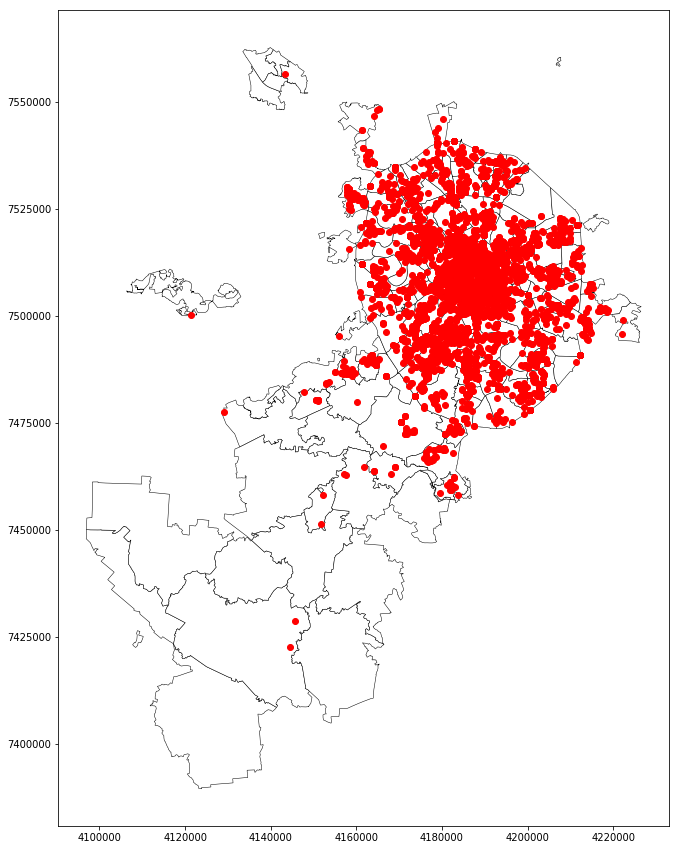

In [212]:
base = mo_gdf_wm.plot(color='white', edgecolor='black', linewidth=0.5, legend = True, figsize=[15,15])
gdf.plot(ax=base, color='red')